In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Read dataset from csv file
data = pd.read_csv('frogs_mfcc1.csv', sep=',',header=None)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
4524,0.111295,0.177192,0.606549,0.257677,0.095557,-0.059224,0.010731,0.155615,-0.015699,-0.145338,...,-0.256277,-0.167617,0.264262,0.222741,-0.057930,-0.163352,-0.134454,0.093734,0.217901,AdenomeraHylaedactylus
4533,0.202921,0.306537,0.706341,0.130257,0.019235,-0.090970,0.076786,0.224931,-0.021109,-0.223403,...,-0.304949,-0.143259,0.304121,0.134295,-0.184823,-0.124162,0.043617,0.200735,0.090043,AdenomeraHylaedactylus
13,0.126523,-0.040482,0.341129,0.381446,0.261154,-0.017049,-0.294064,-0.222278,0.282338,0.318772,...,0.039459,0.202870,0.029333,-0.071544,-0.060630,-0.067230,-0.038196,0.070127,0.048440,AdenomeraAndre
1977,0.288686,0.257334,0.580794,0.150552,0.022468,-0.041250,0.139735,0.294945,-0.029576,-0.410918,...,-0.121716,-0.345044,0.056753,0.182342,-0.045592,-0.118013,-0.094401,0.010279,0.137074,AdenomeraHylaedactylus
4937,0.529831,0.224731,0.427884,0.325060,0.173346,-0.025711,-0.165752,0.048385,0.409454,0.271933,...,0.192883,0.259609,0.039216,-0.132862,-0.169445,-0.029199,0.157213,0.109628,-0.108624,HylaMinuta


In [38]:
data.shape

(7195, 22)

In [39]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [40]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [41]:
data[21].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: 21, dtype: int64

In [42]:
x=data.drop(21,axis='columns')
y=data[21]

y

0       AdenomeraAndre
1       AdenomeraAndre
2       AdenomeraAndre
3       AdenomeraAndre
4       AdenomeraAndre
             ...      
7190       ScinaxRuber
7191       ScinaxRuber
7192       ScinaxRuber
7193       ScinaxRuber
7194       ScinaxRuber
Name: 21, Length: 7195, dtype: object

In [43]:
y=pd.get_dummies(y,drop_first=True)
y.sample(10)

,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber
6438,0,0,0,0,1,0,0,0,0
3303,1,0,0,0,0,0,0,0,0
3065,1,0,0,0,0,0,0,0,0
2476,1,0,0,0,0,0,0,0,0
6640,0,0,0,0,0,1,0,0,0
3062,1,0,0,0,0,0,0,0,0
6327,0,0,0,0,1,0,0,0,0
3740,1,0,0,0,0,0,0,0,0
7083,0,0,0,0,0,0,0,0,1
7009,0,0,0,0,0,0,0,1,0


In [44]:
y.value_counts()

AdenomeraHylaedactylus  Ameeregatrivittata  HylaMinuta  HypsiboasCinerascens  HypsiboasCordobae  LeptodactylusFuscus  OsteocephalusOophagus  Rhinellagranulosa  ScinaxRuber
1                       0                   0           0                     0                  0                    0                      0                  0              3478
0                       0                   0           0                     1                  0                    0                      0                  0              1121
                                                                              0                  0                    0                      0                  0               672
                        1                   0           0                     0                  0                    0                      0                  0               542
                        0                   0           1                     0                  0          

In [45]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_val.shape)
print(y_train.shape)
print(y_test.shape)

(4856, 21)
(1799, 21)
(540, 21)
(540, 9)
(4856, 9)
(1799, 9)


In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
# create the model
model=keras.Sequential([
    keras.layers.Dense(21,input_dim=21,activation='relu'),
    keras.layers.Dense(18,activation='relu'),
    keras.layers.Dense(14,activation='relu'),
    keras.layers.Dense(9,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(filepath='checkpoints/',monitor='val_loss',save_weights_only=True)
]

In [48]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [49]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),batch_size=32, epochs=20, shuffle=True, verbose=1, validation_split=0,callbacks=my_callbacks)

Epoch 1/20
152/152 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.5768 - val_loss: 0.2120 - val_accuracy: 0.5574
Epoch 2/20
152/152 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.6129 - val_loss: 0.1453 - val_accuracy: 0.6204
Epoch 3/20
152/152 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.6806 - val_loss: 0.1179 - val_accuracy: 0.6963
Epoch 4/20
152/152 [==============================] - 0s 1ms/step - loss: 0.1063 - accuracy: 0.7360 - val_loss: 0.0966 - val_accuracy: 0.7667
Epoch 5/20
152/152 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.7809 - val_loss: 0.0814 - val_accuracy: 0.7815
Epoch 6/20
152/152 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.7953 - val_loss: 0.0663 - val_accuracy: 0.8130
Epoch 7/20
152/152 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.8233 - val_loss: 0.0542 - val_accuracy: 0.8333
Epoch 

In [50]:
model.evaluate(x_test,y_test)

57/57 [==============================] - 0s 679us/step - loss: 0.0325 - accuracy: 0.8638


[0.03254121169447899, 0.8638132214546204]

In [51]:
y_pred=model.predict(x_test)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

57/57 [==============================] - 0s 643us/step
[[9.84474182e-01 6.59963273e-12 1.56042827e-02 6.36589888e-16
  1.46523162e-05 3.87865953e-07 8.40354479e-13 4.77131948e-07
  5.21256115e-05]
 [4.88490681e-04 1.15656749e-05 9.62622798e-05 9.87018347e-01
  1.24988628e-06 1.99230760e-03 8.10587034e-03 1.38240354e-02
  1.91125590e-02]
 [1.98575645e-03 4.13382106e-04 7.36741209e-03 5.84971758e-06
  9.82478440e-01 1.24632148e-03 3.75630130e-04 1.71593740e-03
  3.42113078e-02]
 [9.97387409e-01 1.73885930e-13 5.15148370e-03 4.11986788e-15
  1.28969464e-06 7.02829425e-07 2.77278092e-13 2.86146985e-07
  6.57718774e-05]
 [9.99043584e-01 2.44095011e-15 1.42566732e-03 4.78925663e-16
  2.43052902e-08 1.41811057e-07 4.10045728e-15 3.91649806e-08
  3.79050107e-05]
 [9.84567463e-01 2.62975319e-12 2.24416913e-03 1.06349710e-13
  4.17425363e-05 1.59428157e-06 4.64064117e-12 5.96585494e-07
  3.94156814e-04]
 [9.64696169e-01 2.05700422e-11 1.20275961e-02 1.37447097e-16
  3.10551732e-05 1.16011556e-07

In [52]:
y_test[:10]

,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber
3340,1,0,0,0,0,0,0,0,0
5108,0,0,0,1,0,0,0,0,0
6524,0,0,0,0,1,0,0,0,0
3649,1,0,0,0,0,0,0,0,0
1617,1,0,0,0,0,0,0,0,0
3113,1,0,0,0,0,0,0,0,0
3337,1,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0
5164,0,0,0,1,0,0,0,0,0


In [53]:
from sklearn.metrics import confusion_matrix,classification_report
#print(y_test.shape)
#print(y_pred.shape)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       860
           1       0.94      0.96      0.95       138
           2       0.94      0.66      0.78        71
           3       0.90      0.95      0.93       110
           4       0.99      0.98      0.98       287
           5       0.94      0.88      0.91        73
           6       0.88      0.56      0.68        25
           7       0.00      0.00      0.00        21
           8       1.00      0.38      0.55        32

   micro avg       0.97      0.94      0.95      1617
   macro avg       0.84      0.71      0.75      1617
weighted avg       0.96      0.94      0.94      1617
 samples avg       0.84      0.84      0.84      1617



In [ ]:
print()

In [54]:
# Save the weights, specify the path
model.save_weights('model_weights/')
# Restore the weights
model.load_weights('model_weights/')


In [55]:
# Save the entire model as a SavedModel.
model.save('models')

INFO:tensorflow:Assets written to: models\assets


In [56]:
model_new = tf.keras.models.load_model('models')

In [57]:
model_new.build(input_shape=(None,30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 21)                462       
                                                                 
 dense_5 (Dense)             (None, 18)                396       
                                                                 
 dense_6 (Dense)             (None, 14)                266       
                                                                 
 dense_7 (Dense)             (None, 9)                 135       
                                                                 
Total params: 1,259
Trainable params: 1,259
Non-trainable params: 0
_________________________________________________________________


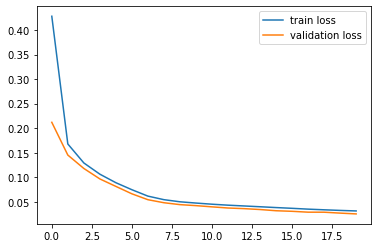

In [58]:
from matplotlib import pyplot as plt

loss_train = history.history['loss']
loss_vald = history.history['val_loss']

plt.plot(loss_train, label='train loss')
plt.plot(loss_vald, label='validation loss')
plt.legend()

In [59]:
#--------------------------------------------------------------------